In [2]:
# Loading Dependencies

from tensorflow import keras

In [3]:
# Loading Reuters Dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

In [4]:
len(train_data)


8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
# Decoding reviews back to English
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_reviews = ' '.join([reverse_word_index.get(i - 3,',') for i in train_data[1]])
print(decode_reviews)
train_labels[1]

, generale de banque sa lt , br and lt heller overseas corp of chicago have each taken 50 pct stakes in , company sa , factors generale de banque said in a statement it gave no financial details of the transaction sa , , turnover in 1986 was 17 5 billion belgian francs reuter 3


4

In [9]:
# Preparing the data by Encoding it.

import numpy as np
print(np.unique(train_labels))
# Vectorizing training and test data
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        results[i,sequence] = 1.
        return results
x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [10]:
x_train    #Vectorised training data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_test   #Vectorised testing data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Vectorizing training and test labels
def to_one_hot(labels,dimention = 46):
    results = np.zeros((len(labels),dimention))
    for i , label in enumerate(labels):
        results[i,label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

In [13]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# Vectorizing training and test labels using Keras( Alternate way)
import numpy as np
from tensorflow.keras.utils.np_utils import to_catedgorical

one_hot_train_labels = to_catedgorical(train_data)
one_hot_test_labels  = to_catedgorical(test_data)

# ModuleNotFoundError: No module named 'tensorflow.keras.utils.np_utils'

ModuleNotFoundError: No module named 'tensorflow.keras.utils.np_utils'

In [16]:
# Model Definition

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46,  activation = 'softmax'))

In [17]:
# Validation approach by setting apart 1000 samples in the training data as validation set.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#y_val = y_train[:10000]
#partial_y_train = y_train[10000:]

In [18]:
# Model Compilation

model.compile(
            optimizer = 'rmsprop',
            loss      = 'categorical_crossentropy',
            metrics   = ['accuracy'])

In [19]:
# Training the Model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size= 512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 226ms/step - loss: 3.8121 - accuracy: 0.0656 - val_loss: 3.7981 - val_accuracy: 0.0460
Epoch 2/20
16/16 [==============================] - 3s 166ms/step - loss: 3.7882 - accuracy: 0.1944 - val_loss: 3.7772 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 2s 97ms/step - loss: 3.7678 - accuracy: 0.2717 - val_loss: 3.7572 - val_accuracy: 0.3530
Epoch 4/20
16/16 [==============================] - 1s 75ms/step - loss: 3.7478 - accuracy: 0.3414 - val_loss: 3.7374 - val_accuracy: 0.3530
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 3.7281 - accuracy: 0.3514 - val_loss: 3.7179 - val_accuracy: 0.3530
Epoch 6/20
16/16 [==============================] - 1s 61ms/step - loss: 3.7085 - accuracy: 0.3514 - val_loss: 3.6985 - val_accuracy: 0.3530
Epoch 7/20
16/16 [==============================] - 1s 64ms/step - loss: 3.6891 - accuracy: 0.3514 - val_loss: 3.6792 - val_accuracy: 0.3530
Epoch 8/20


In [20]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
# Ploting the Training and Validation loss


import matplotlib.pyplot as plt

history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['val_loss']) + 1)

plt.plot(epochs,loss_values,'bo',label = 'Trainging Loss')
plt.plot(epochs,val_loss_values,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<Figure size 640x480 with 1 Axes>

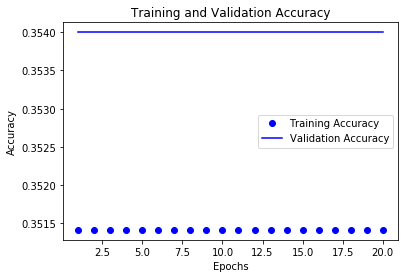

In [89]:
# Ploting the Training and Validation Accuracy

# plt.clf() # To clear the figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs , val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
# Retraining a Model from Scratch

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'sigmoid'))

model.compile(
            optimizer  ='rmsprop',
            loss       = 'categorical_crossentropy',
            metrics    = ['accuracy'])

model.fit(x_train,one_hot_train_labels,epochs = 9,batch_size = 512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
18/18 [==============================] - 3s 172ms/step - loss: 3.8002 - accuracy: 0.3320 - val_loss: 3.7639 - val_accuracy: 0.3540
Epoch 2/9
18/18 [==============================] - 2s 85ms/step - loss: 3.7232 - accuracy: 0.3517 - val_loss: 3.6697 - val_accuracy: 0.3540
Epoch 3/9
18/18 [==============================] - 1s 70ms/step - loss: 3.6139 - accuracy: 0.3517 - val_loss: 3.5435 - val_accuracy: 0.3540
Epoch 4/9
18/18 [==============================] - 1s 61ms/step - loss: 3.4737 - accuracy: 0.3517 - val_loss: 3.3886 - val_accuracy: 0.3540
Epoch 5/9
18/18 [==============================] - 1s 59ms/step - loss: 3.3066 - accuracy: 0.3517 - val_loss: 3.2110 - val_accuracy: 0.3540
Epoch 6/9
18/18 [==============================] - 1s 58ms/step - loss: 3.1232 - accuracy: 0.3517 - val_loss: 3.0245 - val_accuracy: 0.3540
Epoch 7/9
18/18 [==============================] - 1s 58ms/step - loss: 2.9393 - accuracy: 0.3517 - val_loss: 2.8478 - val_accuracy: 0.3540
Epoch 8/9
18/18 [==

In [1]:
results

NameError: name 'results' is not defined

In [ ]:
predictions = model.predict(x_test)
predictions[0].shape
predictions[0]